In [ ]:
#Importing required Modules

In [16]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import warnings

In [17]:
#Raw Breast Cancer data

In [18]:
df=pd.read_csv('BRCA.csv')
df

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
#To increase the Model Accucary we need to eliminate the NULL values

In [20]:
df.isnull().sum() #V

Patient_ID             7
Age                    7
Gender                 7
Protein1               7
Protein2               7
Protein3               7
Protein4               7
Tumour_Stage           7
Histology              7
ER status              7
PR status              7
HER2 status            7
Surgery_type           7
Date_of_Surgery        7
Date_of_Last_Visit    24
Patient_Status        20
dtype: int64

In [21]:
df=df.dropna()
df.isnull().sum()

Patient_ID            0
Age                   0
Gender                0
Protein1              0
Protein2              0
Protein3              0
Protein4              0
Tumour_Stage          0
Histology             0
ER status             0
PR status             0
HER2 status           0
Surgery_type          0
Date_of_Surgery       0
Date_of_Last_Visit    0
Patient_Status        0
dtype: int64

In [22]:
# Now we can do some EDA

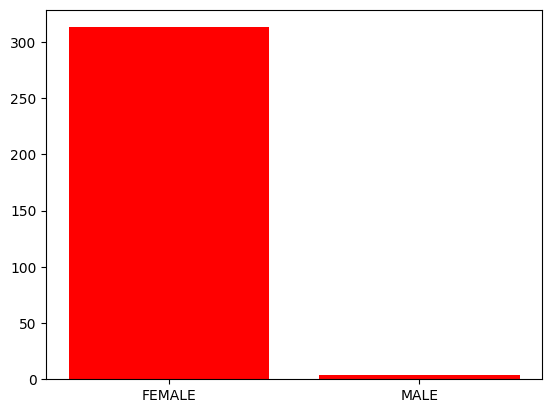

In [23]:
plt.bar(list(df['Gender'].value_counts().keys()),list(df['Gender'].value_counts()),color='Red')
plt.show()

In [24]:
#Stage of Tumour of the patients
stage=df['Tumour_Stage'].value_counts()
stages_tumour=stage.index
quantity=stage.values

fig=px.pie(df,values=quantity,names=stages_tumour,hole=0.5,title="Tumour Stages of Patients")
fig.show()

In [25]:
surgery = df["Surgery_type"].value_counts()
surg_ind = surgery.index
quantity = surgery.values
figure = px.pie(df, 
             values=quantity, 
             names=surg_ind,hole = 0.5, 
             title="Type of Surgery of Patients")
figure.show()

In [28]:
#To train a machine learning model, we need to transform the values of all the Categorical columns
warnings.filterwarnings("ignore")
df["Tumour_Stage"] = df["Tumour_Stage"].map({"I": 1, "II": 2, "III": 3})
df["Histology"] = df["Histology"].map({"Infiltrating Ductal Carcinoma": 1, 
                                           "Infiltrating Lobular Carcinoma": 2, "Mucinous Carcinoma": 3})
df["ER status"] = df["ER status"].map({"Positive": 1})
df["PR status"] = df["PR status"].map({"Positive": 1})
df["HER2 status"] = df["HER2 status"].map({"Positive": 1, "Negative": 2})
df["Gender"] = df["Gender"].map({"MALE": 0, "FEMALE": 1})
df["Surgery_type"] = df["Surgery_type"].map({"Other": 1, "Modified Radical Mastectomy": 2, 
                                                 "Lumpectomy": 3, "Simple Mastectomy": 4})

In [29]:
df

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,NaN,0.080353,0.42638,0.54715,0.273680,NaN,NaN,NaN,NaN,NaN,NaN,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,NaN,-0.420320,0.57807,0.61447,-0.031505,NaN,NaN,NaN,NaN,NaN,NaN,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,NaN,0.213980,1.31140,-0.32747,-0.234260,NaN,NaN,NaN,NaN,NaN,NaN,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,NaN,0.345090,-0.21147,-0.19304,0.124270,NaN,NaN,NaN,NaN,NaN,NaN,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,NaN,0.221550,1.90680,0.52045,-0.311990,NaN,NaN,NaN,NaN,NaN,NaN,06-May-17,27-Jun-19,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,TCGA-AN-A04A,36.0,NaN,0.231800,0.61804,-0.55779,-0.517350,NaN,NaN,NaN,NaN,NaN,NaN,11-Nov-19,09-Feb-20,Dead
330,TCGA-A8-A085,44.0,NaN,0.732720,1.11170,-0.26952,-0.354920,NaN,NaN,NaN,NaN,NaN,NaN,01-Nov-19,04-Mar-20,Dead
331,TCGA-A1-A0SG,61.0,NaN,-0.719470,2.54850,-0.15024,0.339680,NaN,NaN,NaN,NaN,NaN,NaN,11-Nov-19,18-Jan-21,Dead
332,TCGA-A2-A0EU,79.0,NaN,0.479400,2.05590,-0.53136,-0.188480,NaN,NaN,NaN,NaN,NaN,NaN,21-Nov-19,19-Feb-21,Dead


In [81]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(max_depth=4)
from sklearn.model_selection import train_test_split

In [82]:
X = np.array(df[['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3','Protein4', 
                   'Tumour_Stage', 'Histology', 'ER status', 'PR status', 
                   'HER2 status', 'Surgery_type']])
y = np.array(df[['Patient_Status']])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

In [87]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [89]:
# Prediction
# features = [['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3','Protein4', 'Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status', 'Surgery_type']]
features = np.array([[36.0, 1, 0.080353, 0.42638, 0.54715, 0.273680, 3, 1, 1, 1, 2, 2,]])
print(dtc.predict(features))

['Alive']


In [93]:
# accuracy of the model in percentage
dtc.score(X_test,y_test)*100

79.16666666666666